<a href="https://colab.research.google.com/github/Thuoq/Machine-Learning-Basic/blob/main/Endgame_ML_K1N2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Project Final K1_N2 Teacher: Tu Anh
 
* Classification mnist 

**Created**: Lê Văn Thương, Lê Văn Kiên, Nguyễn Trung Phong, Nguyễn Thị Thu Hường.

In [1]:
#import libaries
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import tensorflow_datasets as tfds

## Fetching dataset from Sklearn

In [2]:
# Fetching dataset
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784',version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [3]:
X,y = mnist['data'],mnist['target'] # X for features, y for labels
X.shape,y.shape

((70000, 784), (70000,))

In [4]:
X[0].shape

(784,)

**NOTE**: Một chút khác biệt fetching data giữa **Tensorflow** và **Sklearn**:
- shape đưa ra của **X** ở Sklearn là 784 features có nghĩa trải ngang ra còn ở tensorflow là (28,28(

## Viz Dataset 

Xây dựng 1 hàm có tên là `show_a_image()` để chỉ ra cái ảnh đầu vào của dữ liệu: 

In [5]:
def show_a_image(some_digit):
  """
  @param some_digit: (np.array) have shape (784)
  """
  some_digit_image = some_digit.reshape((28,28))
  plt.imshow(some_digit_image,cmap="binary")
  plt.axis("off")
  plt.show()


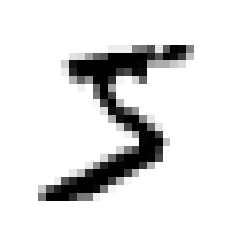

'5'

In [6]:
show_a_image(X[0]);
y[0]

Ở trên chúng ta đã thấy tại bức ảnh vị trí 0 và label ở vị trí 0 là 5. Nhưng có 1 điều ở đây rằng label đang là kiểu **string** hầu như các thuật toán của ML đều xử lý với số nên chúng ta sẽ convert label sang number 

In [7]:
y  = y.astype(np.uint8)

Ở trên chúng ta chỉ mới Viz cho 1 hình ảnh đoạn code dưới đây sẽ làm show  **random 4 images**.

In [10]:
import random
def show_4_images_rand(X,y):
  """
  @param X: for features
  @param y: label
  Show random 4 images
  """
  plt.figure(figsize=(7,7))
  for i in range(4):
    ax = plt.subplot(2,2,i+1)
    rand_idx = random.choice(range(len(X)))
    plt.imshow(X[rand_idx].reshape((28,28)),cmap="binary")
    plt.title(y[rand_idx])
    plt.axis(False)
    

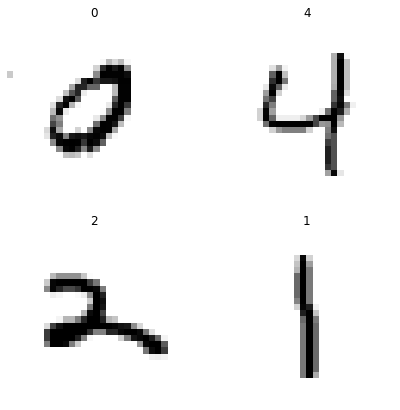

In [11]:
show_4_images_rand(X,y)

## Data Processing 


### Features Scaling 
Trong phần này chúng ta sẽ xử lý dữ liệu và chúng ta sẽ sử dụng 1 trong  các kỹ thuật trong Features Scaling là : 
1. Max scaling ( được biết đến như là normalization)
2. Standardization

**Max Scaling** nó rất đơn giản giá trị được dịch chuyển và thay đổi tỷ lệ để chúng kết thúc từ 0 tới 1 công thức là: trừ giá trị thấp nhất và chia giá trị cao nhất. Trong Sckit-learn là **MinMaxScaler**

**Standardization**: là khác biệt đầu tiên nó trừ đi giá trị trung bình và chia nó cho dộ lệch chuẩn 


1 điểm chút khác biệt giữa 2 thằng kể trên: 
- Thằng **standardization** không bị ràng buộc vào phạm vi cụ thể nào như thằng **min-max**
- **standardization** nó ít bị ảnh hưởng bởi giá trị ngoại biên

Dưới đây chúng tôi sẽ sử dụng thằng **StandardScaler** và **Minmax Scaling** để preprocessing data.

In [8]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scaler = StandardScaler()
_min_max = MinMaxScaler()
X_standardization = scaler.fit_transform(X.astype(np.float64))
X_normalization = _min_max.fit_transform(X.astype(np.float64))


### Split Data 

Trong phần này mình sẽ chia dữ liệu mà mình đã features scaling ở trên  của chúng ta thành 2 phần với **80%** và **20%**:

1. Train Data - (80%)
2. Test Data - (20%)

Trong **Scikit-learn** có 1 hàm là `train_test_split()` để xử lý điều trên.

In [14]:
from sklearn.model_selection import train_test_split
# X_stand_train là của X_standardization
X_stand_train,X_stand_test,y_train,y_test = train_test_split(X_standardization
                                                             ,y
                                                             ,random_state=42
                                                             ,test_size=0.2)
# X_norm_train là của X_normalization
X_norm_train,X_norm_test,y_train,y_test = train_test_split(X_normalization
                                                             ,y
                                                             ,random_state=42
                                                             ,test_size=0.2)


## Sử dụng Model để Training data.
Trong phần này bọn mình sẽ sử dụng 2 thuật toán **Support Vector Machines** và **Random Forests**. 

Trước khi đi vào phần code thì mình sẽ giải thích ý nghĩa của 2 thuật toán trên và code nó ở ngay sau khi giải thích xong. 

### Support Vector Machines (SVM) 



#### Linear SVM Classification 

SVM hay còn được gọi là **Maximum Margin Classifier** để giải thích nó sẽ làm gì thì mình sẽ xin đưa ra 1 hình ảnh này để mọi người nhìn thấy. 


![Image SVM ](https://machinelearningcoban.com/assets/19_svm/svm2.png "Text to show on mouseover")

![Image SVM ](https://machinelearningcoban.com/assets/19_svm/svm5.png "Text to show on mouseover")

Chúng ta có 1 đường thẳng để tách biệt giữa 2 lớp **xanh** và **đỏ** và bài toán SVM là làm sao để tìm được cái *margin* lớn nhất có thể để làm tách biệt 2 lớp này ra. 

#### Nonlinear SVM Classification 

Mặc dù Linear SVM classificaiton sử dụng rất hiệu quả và làm việc rất tốt với trong nhiều trường hợp dataset. Nhưng sẽ có những trường hợp dữ liệu sẽ không là **linearly**. Và với nhũng trường hợp dữ liệu này chúng ta sẽ sử dụng các  hướng tiếp cận sau : 
1. Polynomial Features
2. Polynomial Kernel
3. Similarity Features
4. Gaussian RBF Kernel


##### Polynomial Featues 


**Polynomial Features** được hiểu như là mình sẽ ví dụ tập dữ liệu của mình đang là bậc 1, mình sẽ cho nó lên bậc 2,3 và mình sẽ sử dụng được linear cho trường hợp đó.  như hình ở dưới sẽ mô tả rõ ràng hơn.


![Image SVM ](https://img2018.cnblogs.com/blog/1012590/201903/1012590-20190331181001911-2004060929.png "Text to show on mouseover")

In [17]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
def polynomial_features_svm_clf(degree=2,C=1.0,loss="hinge"):
  return Pipeline([
          ("poly_features",PolynomialFeatures(degree=degree)),
          ("scaler",StandardScaler()),
          ("svm_clf",LinearSVC(C=C,loss=loss))
  ])
model_polynomial_features_svm_clf = polynomial_features_svm_clf().fit(X,y)


##### Polynomial Kernel


##### Similarity Featues 

##### Gausian RBF Kernel 